# Imports necessários

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from numpy import mean
from numpy import std
from matplotlib import pyplot
import seaborn as sns

# Import dos dados

## Receitas

In [2]:
dados_receitas = pd.read_csv('03_dados_carga/arquivos_para_carga/dados_receitas.csv', sep=';')
dados_receitas.head()

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS
0,1722010101,2013-01-03,886cd0eabf5a18,185560.68,prefeitura municipal
1,1722010101,2013-01-04,886cd0eabf5a18,8081.80,prefeitura municipal
2,1722010101,2013-01-07,886cd0eabf5a18,4231.39,prefeitura municipal
3,1722010101,2013-01-08,886cd0eabf5a18,10536.53,prefeitura municipal
4,1722010101,2013-01-15,886cd0eabf5a18,103118.27,prefeitura municipal


# Feature Engineering

## Receitas

### Remoção dos outliers

In [4]:
# Converter a coluna 'DATA' para o tipo datetime
dados_receitas['DATA'] = pd.to_datetime(dados_receitas['DATA'])

# Extrair o ano, mês e dia da coluna 'DATA' como novas features
dados_receitas['ANO'] = dados_receitas['DATA'].dt.year

Q1: 51.23
Q3: 1579.25
IQR: 1528.02
Limite inferior: -2240.7999999999997
Limite superior: 3871.2799999999997
Quantidade de registros sem outliers: 83736


<Axes: title={'center': 'VALOR_ARRECADADO'}, xlabel='[ANO]'>

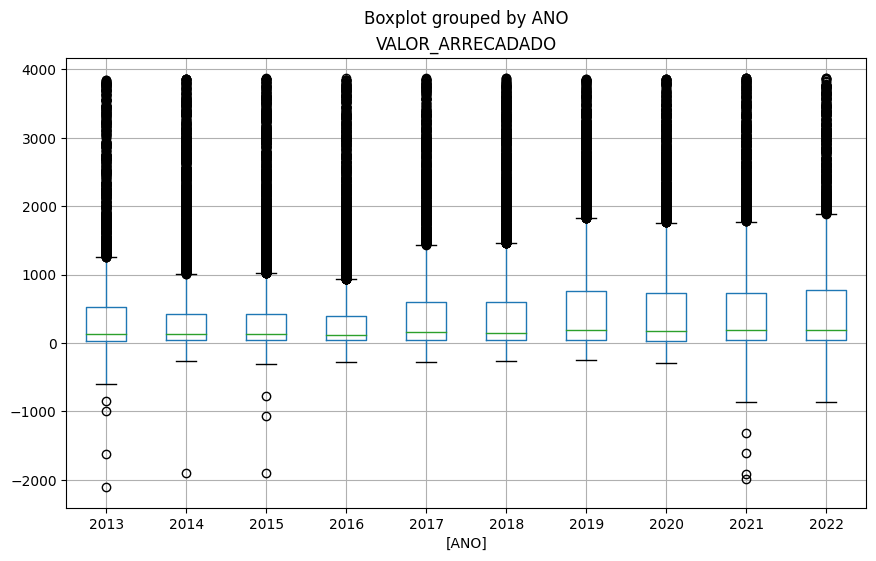

In [5]:
# aplicação de IQR - interquartile range
Q1 = dados_receitas['VALOR_ARRECADADO'].quantile(0.25)
Q3 = dados_receitas['VALOR_ARRECADADO'].quantile(0.75)
IQR = Q3 - Q1
print(f'Q1: {Q1}')
print(f'Q3: {Q3}')
print(f'IQR: {IQR}')

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
print(f'Limite inferior: {limite_inferior}')
print(f'Limite superior: {limite_superior}')

df_sem_outliers = dados_receitas[(dados_receitas['VALOR_ARRECADADO'] >= limite_inferior) & (dados_receitas['VALOR_ARRECADADO'] <= limite_superior)]
df_sem_outliers = df_sem_outliers[['ANO', 'VALOR_ARRECADADO']]
print(f'Quantidade de registros sem outliers: {df_sem_outliers.shape[0]}')
df_sem_outliers.boxplot(by='ANO', figsize=(10, 6))

In [6]:
df_sem_outliers = dados_receitas[(dados_receitas['VALOR_ARRECADADO'] >= limite_inferior) & (dados_receitas['VALOR_ARRECADADO'] <= limite_superior)]

### Sample dos dados

In [7]:
# Coluna pela qual você deseja amostrar proporcionalmente
coluna_amostragem = 'ANO'

# Porcentagem de amostras desejadas)
porcentagem_amostra = 0.01

# Divida o DataFrame em grupos com base na coluna de amostragem
grupos = dados_receitas.groupby(coluna_amostragem, group_keys=False, sort=False)

# Inicialize listas para armazenar os DataFrames de amostra e de não amostra
amostras = []
nao_amostras = []

# Para cada grupo, aplique o método sample com a porcentagem desejada
for nome_grupo, grupo in grupos:
    grupo_amostra = grupo.sample(frac=porcentagem_amostra)
    
    # Adicione o grupo de amostra à lista de amostras
    amostras.append(grupo_amostra)
    
    # Adicione o grupo de não amostra à lista de não amostras
    grupo_nao_amostra = grupo.drop(grupo_amostra.index)
    nao_amostras.append(grupo_nao_amostra)

# Crie um novo DataFrame contendo todas as amostras
df_amostrado = pd.concat(amostras).sort_index()

# Crie um novo DataFrame contendo todos os dados que não entraram no sample
df_nao_amostrado = pd.concat(nao_amostras).sort_index()

In [8]:
df_amostrado['SMA(12)'] = df_amostrado['VALOR_ARRECADADO'].rolling(window=12).mean()
df_amostrado['SMA(6)'] = df_amostrado['VALOR_ARRECADADO'].rolling(window=6).mean()
df_amostrado['SMA(3)'] = df_amostrado['VALOR_ARRECADADO'].rolling(window=2).mean()
df_amostrado['SMA(2)'] = df_amostrado['VALOR_ARRECADADO'].rolling(window=2).mean()
df_amostrado.head()

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS,ANO,SMA(12),SMA(6),SMA(3),SMA(2)
137,1113050001,2013-01-04,886cd0eabf5a18,923.08,prefeitura municipal,2013,NaN,NaN,NaN,NaN
328,1113050001,2013-02-07,886cd0eabf5a18,100.00,prefeitura municipal,2013,NaN,NaN,511.540,511.540
393,1113050002,2013-02-21,886cd0eabf5a18,5235.76,prefeitura municipal,2013,NaN,NaN,2667.880,2667.880
528,1113050001,2013-03-08,886cd0eabf5a18,590.09,prefeitura municipal,2013,NaN,NaN,2912.925,2912.925
624,1724010001,2013-03-26,886cd0eabf5a18,48808.10,prefeitura municipal,2013,NaN,NaN,24699.095,24699.095


In [9]:
df_amostrado['lag(12)'] = df_amostrado['VALOR_ARRECADADO'].shift(12)
df_amostrado['lag(6)'] = df_amostrado['VALOR_ARRECADADO'].shift(6)
df_amostrado['lag(4)'] = df_amostrado['VALOR_ARRECADADO'].shift(4)
df_amostrado['lag(3)'] = df_amostrado['VALOR_ARRECADADO'].shift(3)
df_amostrado['lag(2)'] = df_amostrado['VALOR_ARRECADADO'].shift(2)
df_amostrado['lag(1)'] = df_amostrado['VALOR_ARRECADADO'].shift(1)
df_amostrado.head()

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS,ANO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
137,1113050001,2013-01-04,886cd0eabf5a18,923.08,prefeitura municipal,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,1113050001,2013-02-07,886cd0eabf5a18,100.00,prefeitura municipal,2013,NaN,NaN,511.540,511.540,NaN,NaN,NaN,NaN,NaN,923.08
393,1113050002,2013-02-21,886cd0eabf5a18,5235.76,prefeitura municipal,2013,NaN,NaN,2667.880,2667.880,NaN,NaN,NaN,NaN,923.08,100.00
528,1113050001,2013-03-08,886cd0eabf5a18,590.09,prefeitura municipal,2013,NaN,NaN,2912.925,2912.925,NaN,NaN,NaN,923.08,100.00,5235.76
624,1724010001,2013-03-26,886cd0eabf5a18,48808.10,prefeitura municipal,2013,NaN,NaN,24699.095,24699.095,NaN,NaN,923.08,100.00,5235.76,590.09


In [10]:
df_amostrado.dropna(inplace=True)
df_amostrado.head()

,COD_RECEITA,DATA,COD_CONTRIBUINTE,VALOR_ARRECADADO,FONTE_DADOS,ANO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
1406,1220990100,2013-05-10,886cd0eabf5a18,7.30,prefeitura municipal,2013,24851.269167,40243.668333,236.965,236.965,923.08,1924.43,247018.51,469.33,26354.96,466.63
1508,1722010101,2013-06-11,886cd0eabf5a18,46152.90,prefeitura municipal,2013,28689.010833,53411.605000,23080.100,23080.100,100.00,-32854.72,469.33,26354.96,466.63,7.30
1583,1600990001,2013-06-06,886cd0eabf5a18,831.28,prefeitura municipal,2013,28321.970833,12380.400000,23492.090,23492.090,5235.76,247018.51,26354.96,466.63,7.30,46152.90
1619,1113050001,2013-06-27,886cd0eabf5a18,6718.14,prefeitura municipal,2013,28832.641667,13421.868333,3774.710,3774.710,590.09,469.33,466.63,7.30,46152.90,831.28
1669,1325000001,2013-06-28,886cd0eabf5a18,0.95,prefeitura municipal,2013,24765.379167,9029.533333,3359.545,3359.545,48808.10,26354.96,7.30,46152.90,831.28,6718.14


In [11]:
df_amostrado.drop(columns=['COD_RECEITA', 'COD_CONTRIBUINTE', 'FONTE_DADOS', 'ANO'], inplace=True)

In [12]:
df_amostrado['DATA'] = pd.to_datetime(df_amostrado['DATA'])
df_amostrado['DATA'] = df_amostrado['DATA'].map(dt.datetime.toordinal)

### Implementação do modelo

In [13]:
train_size = int(len(df_amostrado) * 0.75)
train_dataset, test_dataset = df_amostrado.iloc[:train_size], df_amostrado.iloc[train_size:]

In [14]:
train_dataset.head()

,DATA,VALOR_ARRECADADO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
1406,734998,7.30,24851.269167,40243.668333,236.965,236.965,923.08,1924.43,247018.51,469.33,26354.96,466.63
1508,735030,46152.90,28689.010833,53411.605000,23080.100,23080.100,100.00,-32854.72,469.33,26354.96,466.63,7.30
1583,735025,831.28,28321.970833,12380.400000,23492.090,23492.090,5235.76,247018.51,26354.96,466.63,7.30,46152.90
1619,735046,6718.14,28832.641667,13421.868333,3774.710,3774.710,590.09,469.33,466.63,7.30,46152.90,831.28
1669,735047,0.95,24765.379167,9029.533333,3359.545,3359.545,48808.10,26354.96,7.30,46152.90,831.28,6718.14


Dimension of train data:  (758, 12)
Dimension of test data:  (253, 12)


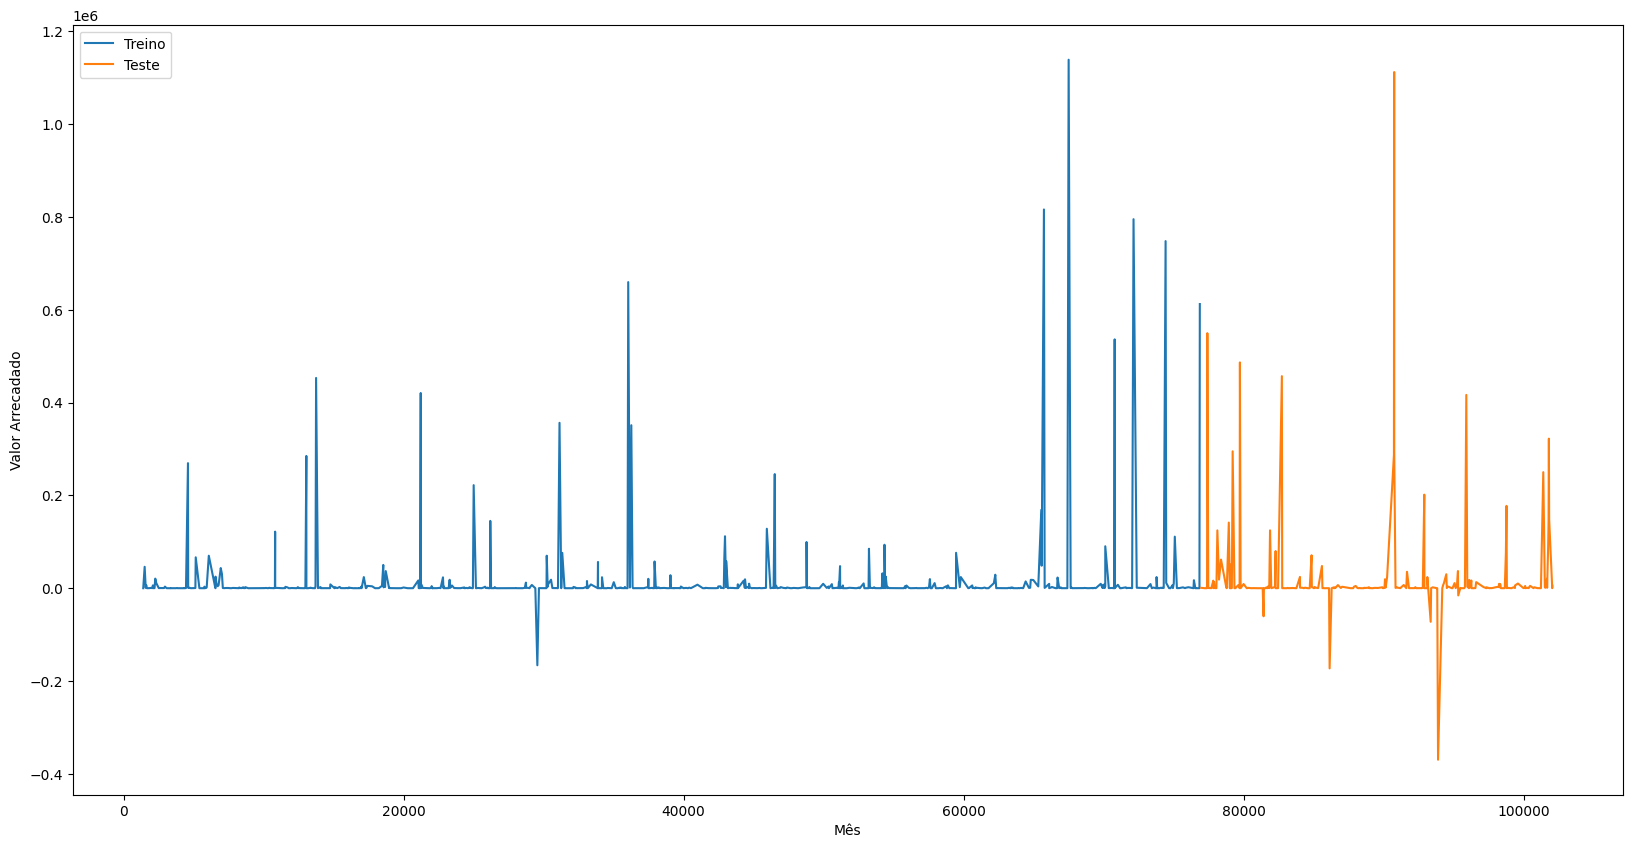

In [15]:
plt.figure(figsize=(20,10))
plt.plot(train_dataset['VALOR_ARRECADADO'])
plt.plot(test_dataset['VALOR_ARRECADADO'])
plt.xlabel('Mês')
plt.ylabel('Valor Arrecadado')
plt.legend(['Treino', 'Teste'], loc='upper left')
print('Dimension of train data: ', train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

In [16]:
X_train = train_dataset.drop(['VALOR_ARRECADADO'], axis=1)
y_train = train_dataset.loc[:, ['VALOR_ARRECADADO']]

In [17]:
X_test = test_dataset.drop(['VALOR_ARRECADADO'], axis=1)
y_test = test_dataset.loc[:, ['VALOR_ARRECADADO']]

In [18]:
print('Dimension of X_train data: ', X_train.shape)
print('Dimension of y_train data: ', y_train.shape)
print('Dimension of X_test data: ', X_test.shape)
print('Dimension of y_test data: ', y_test.shape)

Dimension of X_train data:  (758, 11)
Dimension of y_train data:  (758, 1)
Dimension of X_test data:  (253, 11)
Dimension of y_test data:  (253, 1)


In [19]:
scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range=(0,1))

In [20]:
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

In [21]:
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

In [22]:
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

In [23]:
print('Dimension of train_y_norm data: ', train_x_norm.shape)
print('Dimension of train_x_norm data: ', train_y_norm.shape)
print('Dimension of test_y_norm data: ', test_x_norm.shape)
print('Dimension of test_x_norm data: ', test_y_norm.shape)

Dimension of train_y_norm data:  (758, 11)
Dimension of train_x_norm data:  (758, 1)
Dimension of test_y_norm data:  (253, 11)
Dimension of test_x_norm data:  (253, 1)


In [25]:
X_test = test_x_norm.reshape((test_x_norm.shape[0], 1, test_x_norm.shape[1]))
X_train = train_x_norm.reshape((train_x_norm.shape[0], 1, train_x_norm.shape[1]))
y_test = test_y_norm.reshape((test_y_norm.shape[0], 1))
y_train = train_y_norm.reshape((train_y_norm.shape[0], 1))

Ajuste no modelo com 32, 64 e 128 neurônioss para verficação do mais adequado para a aplicação.

Epoch 1/100
152/152 [==============================] - 12s 20ms/step - loss: 0.0028 - val_loss: 0.0115
Epoch 2/100
152/152 [==============================] - 1s 7ms/step - loss: 0.0012 - val_loss: 0.0098
Epoch 3/100
152/152 [==============================] - 1s 7ms/step - loss: 9.8702e-04 - val_loss: 0.0076
Epoch 4/100
152/152 [==============================] - 1s 9ms/step - loss: 7.8160e-04 - val_loss: 0.0051
Epoch 5/100
152/152 [==============================] - 1s 7ms/step - loss: 6.2507e-04 - val_loss: 0.0032
Epoch 6/100
152/152 [==============================] - 1s 6ms/step - loss: 3.8701e-04 - val_loss: 0.0018
Epoch 7/100
152/152 [==============================] - 1s 7ms/step - loss: 3.3596e-04 - val_loss: 8.3880e-04
Epoch 8/100
152/152 [==============================] - 1s 6ms/step - loss: 2.4079e-04 - val_loss: 5.7227e-04
Epoch 9/100
152/152 [==============================] - 1s 7ms/step - loss: 1.8647e-04 - val_loss: 8.2827e-04
Epoch 10/100
152/152 [===========================

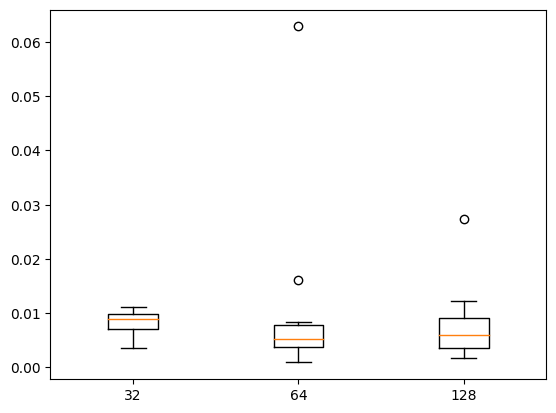

In [26]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, neurons):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = neurons, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = neurons))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=4)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('figura[0].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            scores.append(score)
            print(f'>Neurons={p}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = [32, 64, 128]
run_experiment(n_params)

Epoch 1/100
152/152 [==============================] - 10s 18ms/step - loss: 0.0023 - val_loss: 0.0102
Epoch 2/100
152/152 [==============================] - 1s 7ms/step - loss: 9.2152e-04 - val_loss: 0.0070
Epoch 3/100
152/152 [==============================] - 1s 7ms/step - loss: 6.8377e-04 - val_loss: 0.0039
Epoch 4/100
152/152 [==============================] - 1s 8ms/step - loss: 4.1651e-04 - val_loss: 0.0019
Epoch 5/100
152/152 [==============================] - 1s 7ms/step - loss: 2.4782e-04 - val_loss: 6.2070e-04
Epoch 6/100
152/152 [==============================] - 1s 7ms/step - loss: 2.0936e-04 - val_loss: 0.0010
Epoch 7/100
152/152 [==============================] - 1s 7ms/step - loss: 1.8343e-04 - val_loss: 6.7592e-04
Epoch 8/100
152/152 [==============================] - 1s 7ms/step - loss: 1.2334e-04 - val_loss: 4.0369e-04
Epoch 9/100
152/152 [==============================] - 1s 7ms/step - loss: 1.2081e-04 - val_loss: 1.5819e-04
Epoch 10/100
152/152 [===================

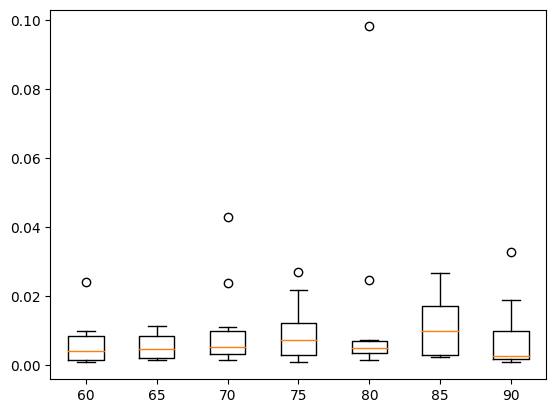

In [27]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, neurons):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = neurons, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = neurons))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=100, batch_size=4, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=4)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('figura[0].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            scores.append(score)
            print(f'>Neurons={p}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = [60, 65, 70, 75, 80, 85, 90]
run_experiment(n_params)

Ajuste de modelo com tamanho do lote 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 e 12, para verificação do mais adequado para a aplicação.

Epoch 1/50
606/606 [==============================] - 9s 7ms/step - loss: 0.0014 - val_loss: 0.0082
Epoch 2/50
606/606 [==============================] - 3s 5ms/step - loss: 7.3070e-04 - val_loss: 0.0028
Epoch 3/50
606/606 [==============================] - 3s 5ms/step - loss: 3.6191e-04 - val_loss: 9.8606e-04
Epoch 4/50
606/606 [==============================] - 3s 6ms/step - loss: 1.8412e-04 - val_loss: 0.0015
Epoch 5/50
606/606 [==============================] - 3s 5ms/step - loss: 1.4029e-04 - val_loss: 0.0011
Epoch 6/50
606/606 [==============================] - 3s 5ms/step - loss: 1.8996e-04 - val_loss: 4.3535e-04
Epoch 7/50
606/606 [==============================] - 3s 5ms/step - loss: 1.7287e-04 - val_loss: 5.8636e-04
Epoch 8/50
606/606 [==============================] - 3s 5ms/step - loss: 1.2379e-04 - val_loss: 3.4758e-04
Epoch 9/50
606/606 [==============================] - 4s 7ms/step - loss: 8.6890e-05 - val_loss: 0.0013
Epoch 10/50
606/606 [==============================]

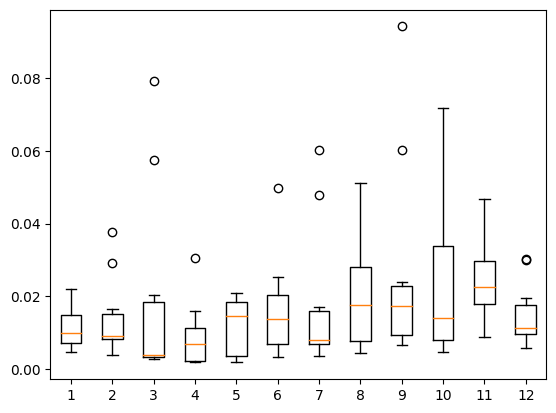

In [28]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, batch_size):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = 80))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=batch_size)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('figura[0].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score * 100.0
            scores.append(score)
            print(f'>p={p}: {r+1}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = np.arange(1, 13)
run_experiment(n_params)

Ajuste no modelo com diluição - dropout - 0.05, 0.1, 0.2, 0.3, para verficação do mais adequado para a aplicação.

Epoch 1/50
122/122 [==============================] - 8s 18ms/step - loss: 0.0023 - val_loss: 0.0104
Epoch 2/50
122/122 [==============================] - 1s 8ms/step - loss: 9.8775e-04 - val_loss: 0.0079
Epoch 3/50
122/122 [==============================] - 1s 7ms/step - loss: 7.1105e-04 - val_loss: 0.0051
Epoch 4/50
122/122 [==============================] - 1s 7ms/step - loss: 5.0505e-04 - val_loss: 0.0030
Epoch 5/50
122/122 [==============================] - 1s 7ms/step - loss: 3.4763e-04 - val_loss: 0.0011
Epoch 6/50
122/122 [==============================] - 1s 7ms/step - loss: 1.7800e-04 - val_loss: 5.4346e-04
Epoch 7/50
122/122 [==============================] - 1s 8ms/step - loss: 1.1472e-04 - val_loss: 8.7140e-04
Epoch 8/50
122/122 [==============================] - 1s 7ms/step - loss: 8.7840e-05 - val_loss: 0.0012
Epoch 9/50
122/122 [==============================] - 1s 7ms/step - loss: 8.1067e-05 - val_loss: 0.0024
Epoch 10/50
122/122 [==============================] - 1s 7

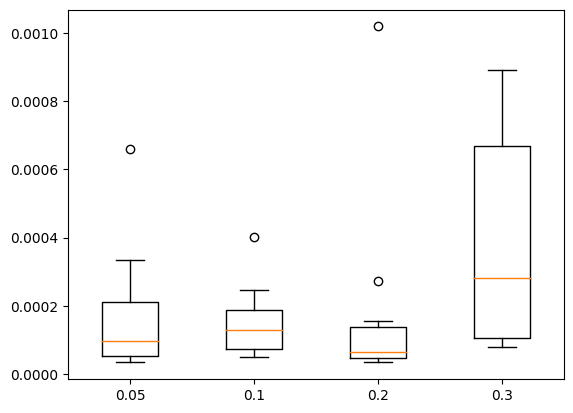

In [29]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test, dropout):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 80, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.LSTM(units = 80))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=5)
    return loss

# Resumindo as pontuações
def summarize_results(scores, params):
    print(scores, params)
    # resumindo a média e desvio padrão
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print(f'Param={params[i]}, Mean={m:.3f}:, Std={s:.3f}')
    # boxplot das pontuações
    pyplot.boxplot(scores, labels=params)
    pyplot.savefig('figura[0].png')

# Rodando um experimento
def run_experiment(params, repeats = 10):
    # Testando cada parâmetro
    all_scores = list()
    for p in params:
        # repetindo o experimento
        scores = list()
        for r in range(repeats):
            score = evaluate_model(X_train, y_train, X_test, y_test, p)
            score = score
            scores.append(score)
            print(f'>p={p}: {r+1}, Score={score}')
        all_scores.append(scores)
    # resumindo os resultados
    summarize_results(all_scores, params)

# Rodando o experimento
n_params = [0.05, 0.1, 0.2, 0.3]
run_experiment(n_params)

Ajustando o modelo com os padrões mais adequados visualizados nos testes anteriores.

In [30]:
# Ajustando e validando o modelo
def evaluate_model(X_train, y_train, X_test, y_test):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = 85, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.LSTM(units = 85))
    model.add(tf.keras.layers.Dropout(0.1))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    # ajustando o modelo
    model.fit(X_train, y_train, epochs=150, batch_size=9, validation_split = 0.2, shuffle=False)
    # avaliando o modelo
    loss = model.evaluate(X_test, y_test, verbose=0, batch_size=9)
    return loss

# Resumindo as pontuações
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print(f'Loss: Mean = {m:.3f}, Std = {s:.3f}')

# Rodando um experimento
def run_experiment(repeats = 10):
    # repetindo o experimento
    scores = list()
    for r in range(repeats):
        score = evaluate_model(X_train, y_train, X_test, y_test)
        score = score
        scores.append(score)
        print(f'>{r+1}: Score={score}')
    # resumindo os resultados
    summarize_results(scores)

# Rodando o experimento
run_experiment()

Epoch 1/150
68/68 [==============================] - 8s 28ms/step - loss: 0.0032 - val_loss: 0.0110
Epoch 2/150
68/68 [==============================] - 0s 7ms/step - loss: 0.0011 - val_loss: 0.0095
Epoch 3/150
68/68 [==============================] - 1s 8ms/step - loss: 9.2736e-04 - val_loss: 0.0076
Epoch 4/150
68/68 [==============================] - 1s 9ms/step - loss: 7.7348e-04 - val_loss: 0.0056
Epoch 5/150
68/68 [==============================] - 1s 9ms/step - loss: 5.9080e-04 - val_loss: 0.0039
Epoch 6/150
68/68 [==============================] - 1s 8ms/step - loss: 4.7910e-04 - val_loss: 0.0024
Epoch 7/150
68/68 [==============================] - 1s 7ms/step - loss: 3.4696e-04 - val_loss: 0.0012
Epoch 8/150
68/68 [==============================] - 1s 8ms/step - loss: 1.9836e-04 - val_loss: 4.9834e-04
Epoch 9/150
68/68 [==============================] - 0s 7ms/step - loss: 1.3948e-04 - val_loss: 0.0010
Epoch 10/150
68/68 [==============================] - 1s 8ms/step - loss: 1.

Criando modelo:

In [31]:
def create_model(units, dropout):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.LSTM(units = units, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.LSTM(units = units))
    model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(units = 1))
    # compilando o modelo
    model.compile(loss='mse', optimizer='adam')
    return model

In [32]:
model_lstm = create_model(85, 0.2)

In [33]:
def fit_model(model):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model.fit(X_train, y_train, epochs=150, batch_size=5, validation_split = 0.2, shuffle=False, callbacks=[early_stop])
    return history

In [34]:
history_lstm = fit_model(model_lstm)

Epoch 1/150


122/122 [==============================] - 8s 18ms/step - loss: 0.0025 - val_loss: 0.0107
Epoch 2/150
122/122 [==============================] - 1s 8ms/step - loss: 0.0011 - val_loss: 0.0088
Epoch 3/150
122/122 [==============================] - 1s 8ms/step - loss: 8.3288e-04 - val_loss: 0.0062
Epoch 4/150
122/122 [==============================] - 1s 9ms/step - loss: 6.6735e-04 - val_loss: 0.0041
Epoch 5/150
122/122 [==============================] - 1s 8ms/step - loss: 5.3216e-04 - val_loss: 0.0029
Epoch 6/150
122/122 [==============================] - 1s 8ms/step - loss: 3.4325e-04 - val_loss: 0.0013
Epoch 7/150
122/122 [==============================] - 1s 8ms/step - loss: 2.8885e-04 - val_loss: 0.0015
Epoch 8/150
122/122 [==============================] - 1s 7ms/step - loss: 2.2547e-04 - val_loss: 6.7898e-04
Epoch 9/150
122/122 [==============================] - 1s 7ms/step - loss: 1.7449e-04 - val_loss: 9.9445e-05
Epoch 10/150
122/122 [==============================] - 1s 7ms/ste

Salvamento do modelo:

In [35]:
model_lstm.save('receitas_2013_2022')

INFO:tensorflow:Assets written to: receitas_2013_2022\assets


INFO:tensorflow:Assets written to: receitas_2013_2022\assets


Carga do modelo salvo:

In [36]:
model_lstm = tf.keras.models.load_model('receitas_2013_2022')

Pré-processamento e predição da base de testes com a utilização do modelo carregado:

In [37]:
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

In [38]:
def prediction(model):
    y_pred = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred)
    return y_pred

In [39]:
prediction_lstm = prediction(model_lstm)

8/8 [==============================] - 1s 4ms/step


In [40]:
def plot_future(prediction, y_test):
    plt.figure(figsize=(10,6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), label='Dados reais')
    plt.plot(np.arange(range_future), np.array(prediction),label='Predição')
    plt.legend(loc='upper left')
    plt.xlabel('Mês')
    plt.ylabel('Valor Arrecadado')
    plt.title('Predição de Receitas - LSTM')
    plt.savefig('figura[1].png')
    plt.show()

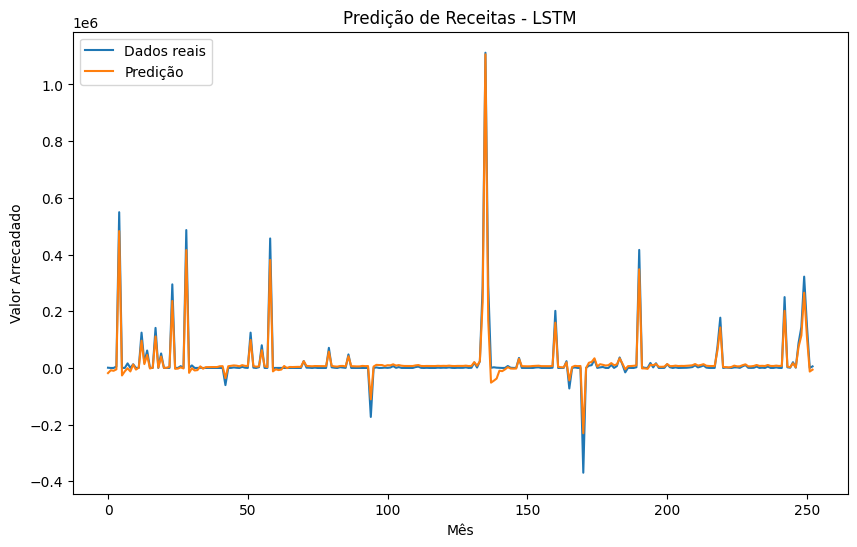

In [41]:
plot_future(prediction_lstm, y_test)

Cálculo do erro médio absoluto e raiz quadrática média:

In [46]:
def evaluate_prediction(prediction_lstm, actual, model_name):
    errors = prediction_lstm - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(f'{model_name}:')
    print(f'MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}')

In [47]:
evaluate_prediction(prediction_lstm, y_test, 'LSTM')

LSTM:
MSE: 385392166.90, RMSE: 19631.41, MAE: 10497.85


Pré-processamento dos dados e aplicação do modelo em toda a base de dados (treino + teste):

In [48]:
X = df_amostrado.drop(['VALOR_ARRECADADO'], axis=1)
y = df_amostrado.loc[:, ['VALOR_ARRECADADO']]

In [49]:
y_norm = output_scaler.transform(y)
X_norm = input_scaler.transform(X)

In [52]:
X = X_norm.reshape((X_norm.shape[0], 1, X_norm.shape[1]))
y = y_norm.reshape((y_norm.shape[0], 1))

In [53]:
y = scaler_y.inverse_transform(y)

In [54]:
def prediction(model):
    y_pred = model.predict(X)
    y_pred = scaler_y.inverse_transform(y_pred)
    return y_pred

In [55]:
prediction_lstm = prediction(model_lstm)

32/32 [==============================] - 0s 7ms/step


In [56]:
def plot_future(prediction, y):
    plt.figure(figsize=(10,6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y), label='Dados reais')
    plt.plot(np.arange(range_future), np.array(prediction),label='Predição')
    plt.legend(loc='upper left')
    plt.xlabel('Mês')
    plt.ylabel('Valor Arrecadado')
    plt.title('Predição de Receitas - LSTM')
    plt.savefig('figura[2].png')
    plt.show()

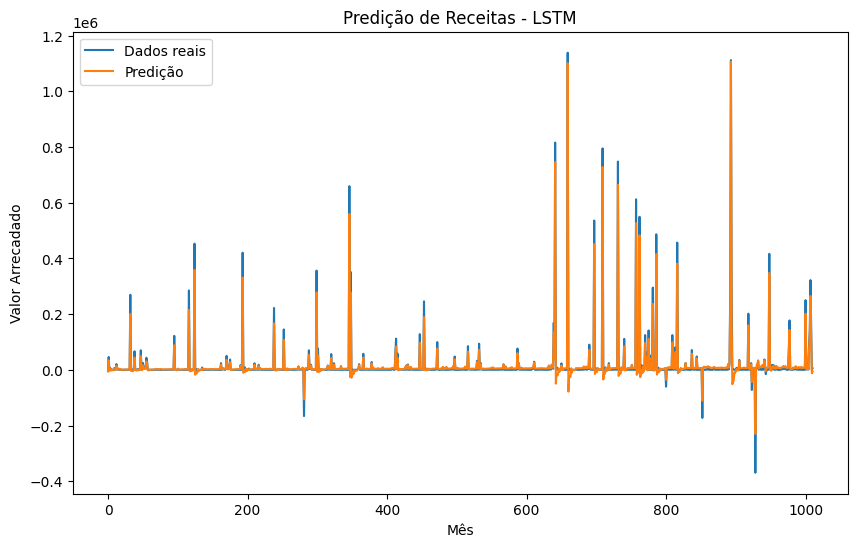

In [64]:
plot_future(prediction_lstm, y)

Cálculo do erro médio percentual:

In [57]:
real = y.flatten()
previsto = prediction_lstm.flatten()

In [60]:
tabela = pd.DataFrame([real, previsto]).T
tabela = tabela.rename(columns={0: 'Real', 1: 'Previsto'})
tabela['Diferenca'] = 1 - (tabela['Real'] / tabela['Previsto'])
media_tabela = tabela['Diferenca'].mean()
print(f'Erro médio percentual: {media_tabela:.2f}%')

Erro médio percentual: 1.03%


Distribuição de erros:

<Axes: xlabel='Diferenca', ylabel='Count'>

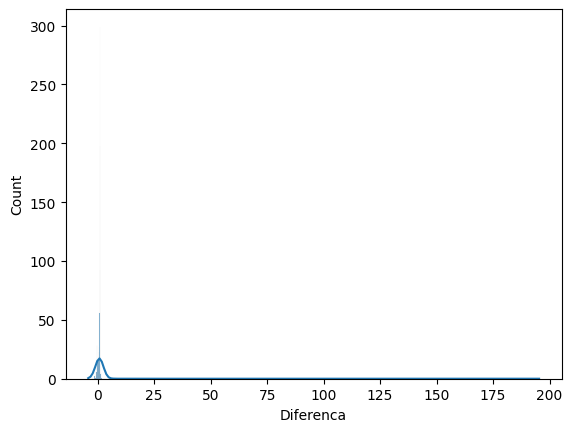

In [61]:
sns.histplot(data=tabela, x='Diferenca', kde=True)

In [89]:
previsao = df_amostrado

In [90]:
previsao

,DATA,VALOR_ARRECADADO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
1406,734998,7.30,24851.269167,40243.668333,236.965,236.965,923.08,1924.43,247018.51,469.33,26354.96,466.63
1508,735030,46152.90,28689.010833,53411.605000,23080.100,23080.100,100.00,-32854.72,469.33,26354.96,466.63,7.30
1583,735025,831.28,28321.970833,12380.400000,23492.090,23492.090,5235.76,247018.51,26354.96,466.63,7.30,46152.90
1619,735046,6718.14,28832.641667,13421.868333,3774.710,3774.710,590.09,469.33,466.63,7.30,46152.90,831.28
1669,735047,0.95,24765.379167,9029.533333,3359.545,3359.545,48808.10,26354.96,7.30,46152.90,831.28,6718.14
...,...,...,...,...,...,...,...,...,...,...,...,...
101772,738273,144240.11,42472.112500,42872.793333,116336.410,116336.410,5079.69,250000.00,899.32,20347.52,914.60,88432.71
101794,738243,322140.88,69306.652500,96162.523333,233190.495,233190.495,126.40,2402.50,20347.52,914.60,88432.71,144240.11
101814,738182,148323.76,81656.465833,120733.263333,235232.320,235232.320,126.00,899.32,914.60,88432.71,144240.11,322140.88
102033,738357,83.60,81500.096667,117355.943333,74203.680,74203.680,1960.03,20347.52,88432.71,144240.11,322140.88,148323.76


In [91]:
periodo = 10  # escolha o período de previsão à frente será executado

for i in range(periodo):
    # Crie uma nova linha de dados vazia
    row = pd.DataFrame(columns=previsao.columns)

    # Calcule as médias e valores de atraso
    row.loc[0, 'SMA(12)'] = previsao['VALOR_ARRECADADO'].iloc[-12:].mean()
    row.loc[0, 'SMA(6)'] = previsao['VALOR_ARRECADADO'].iloc[-6:].mean()
    row.loc[0, 'SMA(3)'] = previsao['VALOR_ARRECADADO'].iloc[-3:].mean()
    row.loc[0, 'SMA(2)'] = previsao['VALOR_ARRECADADO'].iloc[-2:].mean()
    row.loc[0, 'lag(12)'] = previsao['VALOR_ARRECADADO'].iloc[-12]
    row.loc[0, 'lag(6)'] = previsao['VALOR_ARRECADADO'].iloc[-6]
    row.loc[0, 'lag(4)'] = previsao['VALOR_ARRECADADO'].iloc[-4]
    row.loc[0, 'lag(3)'] = previsao['VALOR_ARRECADADO'].iloc[-3]
    row.loc[0, 'lag(2)'] = previsao['VALOR_ARRECADADO'].iloc[-2]
    row.loc[0, 'lag(1)'] = previsao['VALOR_ARRECADADO'].iloc[-1]

    # Incremente a data
    row.loc[0, 'DATA'] = previsao['DATA'].iloc[-1]+1
    
    # Excluindo a coluna de valor arrecadado
    row = row.drop(['VALOR_ARRECADADO'], axis=1)
    
    # Transforme a linha em um array e normalize
    row = np.array(row.iloc[-1]).reshape(1, -1)
    row_norm = input_scaler.transform(row)

    # Preveja usando o modelo LSTM
    to_prev = row_norm.reshape((row_norm.shape[0], 1, row_norm.shape[1]))
    prev = model_lstm.predict(to_prev)
    prev = scaler_y.inverse_transform(prev)

    # Crie um DataFrame com a previsão e adicione ao DataFrame principal
    row_['VALOR_ARRECADADO'] = prev[0]
    previsao = pd.concat([previsao, row_], ignore_index=True)

1/1 [==============================] - 0s 64ms/step


c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step


c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step


c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - ETA: 0s

c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step


c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step


c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step


c:\Users\allys\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [92]:
previsao

,DATA,VALOR_ARRECADADO,SMA(12),SMA(6),SMA(3),SMA(2),lag(12),lag(6),lag(4),lag(3),lag(2),lag(1)
0,734998,7.300000,24851.269167,40243.668333,236.965,236.965,923.08,1924.43,247018.51,469.33,26354.96,466.63
1,735030,46152.900000,28689.010833,53411.605,23080.1,23080.1,100.0,-32854.72,469.33,26354.96,466.63,7.3
2,735025,831.280000,28321.970833,12380.4,23492.09,23492.09,5235.76,247018.51,26354.96,466.63,7.3,46152.9
3,735046,6718.140000,28832.641667,13421.868333,3774.71,3774.71,590.09,469.33,466.63,7.3,46152.9,831.28
4,735047,0.950000,24765.379167,9029.533333,3359.545,3359.545,48808.1,26354.96,7.3,46152.9,831.28,6718.14
...,...,...,...,...,...,...,...,...,...,...,...,...
1016,738356,9373.322266,81946.339167,118130.138333,51322.376667,2821.685,11.3,88432.71,322140.88,148323.76,83.6,5559.77
1017,738356,11512.037109,81946.339167,118130.138333,51322.376667,2821.685,11.3,88432.71,322140.88,148323.76,83.6,5559.77
1018,738356,10594.389648,81946.339167,118130.138333,51322.376667,2821.685,11.3,88432.71,322140.88,148323.76,83.6,5559.77
1019,738356,11038.994141,81946.339167,118130.138333,51322.376667,2821.685,11.3,88432.71,322140.88,148323.76,83.6,5559.77
